In [82]:
%matplotlib inline

import os

import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
country = geopandas.read_file("../data/gz_2010_us_040_00_5m.json")
print(type(country))
country.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


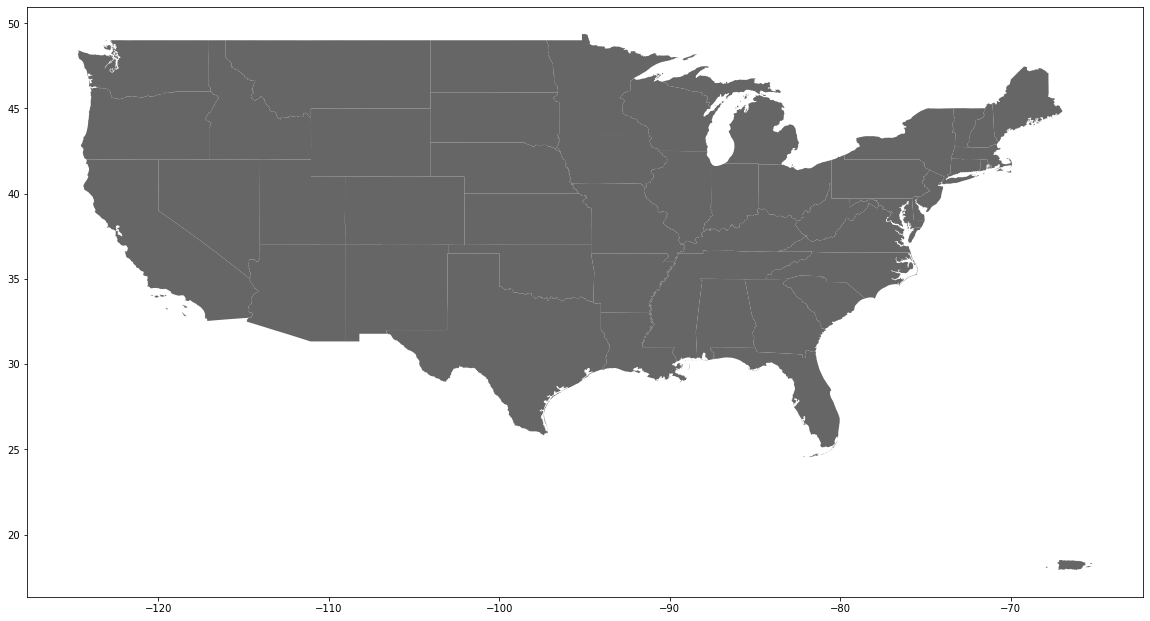

In [123]:
# Plot the data excluding Alaska and Hawaii
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(20,20), color='#666666')

In [85]:
# Read in Hurricane Katrina Data
katrina = pd.read_csv('../data/katrina.csv')
print(type(katrina))
katrina.head()

<class 'pandas.core.frame.DataFrame'>


,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/23/2005 17:00,23.2,75.5,35,1007,NORTHWEST NEAR 8 MPH,Tropical Depression,TWELVE,08/23/2005 16:43,Stewart
1,1A,08/23/2005 20:00,23.3,75.8,35,1007,WEST-NORTHWEST NEAR 7 MPH,Tropical Depression,TWELVE,08/23/2005 20:03,Knabb
2,2,08/23/2005 23:00,23.4,76.0,35,1007,NORTHWEST NEAR 7 MPH,Tropical Depression,TWELVE,08/23/2005 22:52,Knabb
3,2A,08/24/2005 02:00,23.6,76.0,35,1007,NORTHWEST NEAR 5 MPH,Tropical Depression,TWELVE,08/24/2005 01:52,Beven
4,3,08/24/2005 05:00,24.0,76.4,35,1006,NORTHWEST NEAR 7 MPH,Tropical Depression,TWELVE,08/24/2005 04:34,Beven


In [86]:
# Combine Latitude and Longitude to create coordinates
katrina['Long'] = 0 - katrina['Long']
katrina['coordinates'] = katrina[['Long', 'Lat']].values.tolist()
print(type(katrina))
katrina.head()

<class 'pandas.core.frame.DataFrame'>


,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,08/23/2005 17:00,23.2,-75.5,35,1007,NORTHWEST NEAR 8 MPH,Tropical Depression,TWELVE,08/23/2005 16:43,Stewart,"[-75.5, 23.2]"
1,1A,08/23/2005 20:00,23.3,-75.8,35,1007,WEST-NORTHWEST NEAR 7 MPH,Tropical Depression,TWELVE,08/23/2005 20:03,Knabb,"[-75.8, 23.3]"
2,2,08/23/2005 23:00,23.4,-76.0,35,1007,NORTHWEST NEAR 7 MPH,Tropical Depression,TWELVE,08/23/2005 22:52,Knabb,"[-76.0, 23.4]"
3,2A,08/24/2005 02:00,23.6,-76.0,35,1007,NORTHWEST NEAR 5 MPH,Tropical Depression,TWELVE,08/24/2005 01:52,Beven,"[-76.0, 23.6]"
4,3,08/24/2005 05:00,24.0,-76.4,35,1006,NORTHWEST NEAR 7 MPH,Tropical Depression,TWELVE,08/24/2005 04:34,Beven,"[-76.4, 24.0]"


In [87]:
# Change the coordinates to a geoPoint
katrina['coordinates'] = katrina['coordinates'].apply(Point)
katrina.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,08/23/2005 17:00,23.2,-75.5,35,1007,NORTHWEST NEAR 8 MPH,Tropical Depression,TWELVE,08/23/2005 16:43,Stewart,POINT (-75.5 23.2)
1,1A,08/23/2005 20:00,23.3,-75.8,35,1007,WEST-NORTHWEST NEAR 7 MPH,Tropical Depression,TWELVE,08/23/2005 20:03,Knabb,POINT (-75.8 23.3)
2,2,08/23/2005 23:00,23.4,-76.0,35,1007,NORTHWEST NEAR 7 MPH,Tropical Depression,TWELVE,08/23/2005 22:52,Knabb,POINT (-76 23.4)
3,2A,08/24/2005 02:00,23.6,-76.0,35,1007,NORTHWEST NEAR 5 MPH,Tropical Depression,TWELVE,08/24/2005 01:52,Beven,POINT (-76 23.6)
4,3,08/24/2005 05:00,24.0,-76.4,35,1006,NORTHWEST NEAR 7 MPH,Tropical Depression,TWELVE,08/24/2005 04:34,Beven,POINT (-76.40000000000001 24)


In [91]:
# Convert the count df to geodf
katrina = geopandas.GeoDataFrame(katrina, geometry='coordinates')
type(katrina)
katrina.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
6,4,08/24/2005 11:00,24.7,-76.7,40,1006,NORTH-NORTHWEST NEAR 8 MPH,Tropical Storm,Katrina,08/24/2005 10:49,Stewart,POINT (-76.70000 24.70000)
7,4A,08/24/2005 14:00,25.2,-77.0,45,1003,NORTH-NORTHWEST NEAR 8 MPH,Tropical Storm,Katrina,08/24/2005 13:58,Stewart,POINT (-77.00000 25.20000)
8,5,08/24/2005 17:00,25.6,-77.2,45,1002,NORTHWEST NEAR 9 MPH,Tropical Storm,Katrina,08/24/2005 16:37,Stewart,POINT (-77.20000 25.60000)
9,5A,08/24/2005 20:00,26.0,-77.6,45,1001,WEST-NORTHWEST NEAR 9 MPH,Tropical Storm,Katrina,08/24/2005 19:43,Avila,POINT (-77.60000 26.00000)
10,6,08/24/2005 23:00,26.0,-78.0,50,1001,WEST NEAR 8 MPH,Tropical Storm,Katrina,08/24/2005 22:40,Avila,POINT (-78.00000 26.00000)


In [98]:
# Only use data from after Katrina was a named storm
katrina = katrina[katrina['Name'] != 'TWELVE']
katrina.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
6,4,08/24/2005 11:00,24.7,-76.7,40,1006,NORTH-NORTHWEST NEAR 8 MPH,Tropical Storm,Katrina,08/24/2005 10:49,Stewart,POINT (-76.70000 24.70000)
7,4A,08/24/2005 14:00,25.2,-77.0,45,1003,NORTH-NORTHWEST NEAR 8 MPH,Tropical Storm,Katrina,08/24/2005 13:58,Stewart,POINT (-77.00000 25.20000)
8,5,08/24/2005 17:00,25.6,-77.2,45,1002,NORTHWEST NEAR 9 MPH,Tropical Storm,Katrina,08/24/2005 16:37,Stewart,POINT (-77.20000 25.60000)
9,5A,08/24/2005 20:00,26.0,-77.6,45,1001,WEST-NORTHWEST NEAR 9 MPH,Tropical Storm,Katrina,08/24/2005 19:43,Avila,POINT (-77.60000 26.00000)
10,6,08/24/2005 23:00,26.0,-78.0,50,1001,WEST NEAR 8 MPH,Tropical Storm,Katrina,08/24/2005 22:40,Avila,POINT (-78.00000 26.00000)


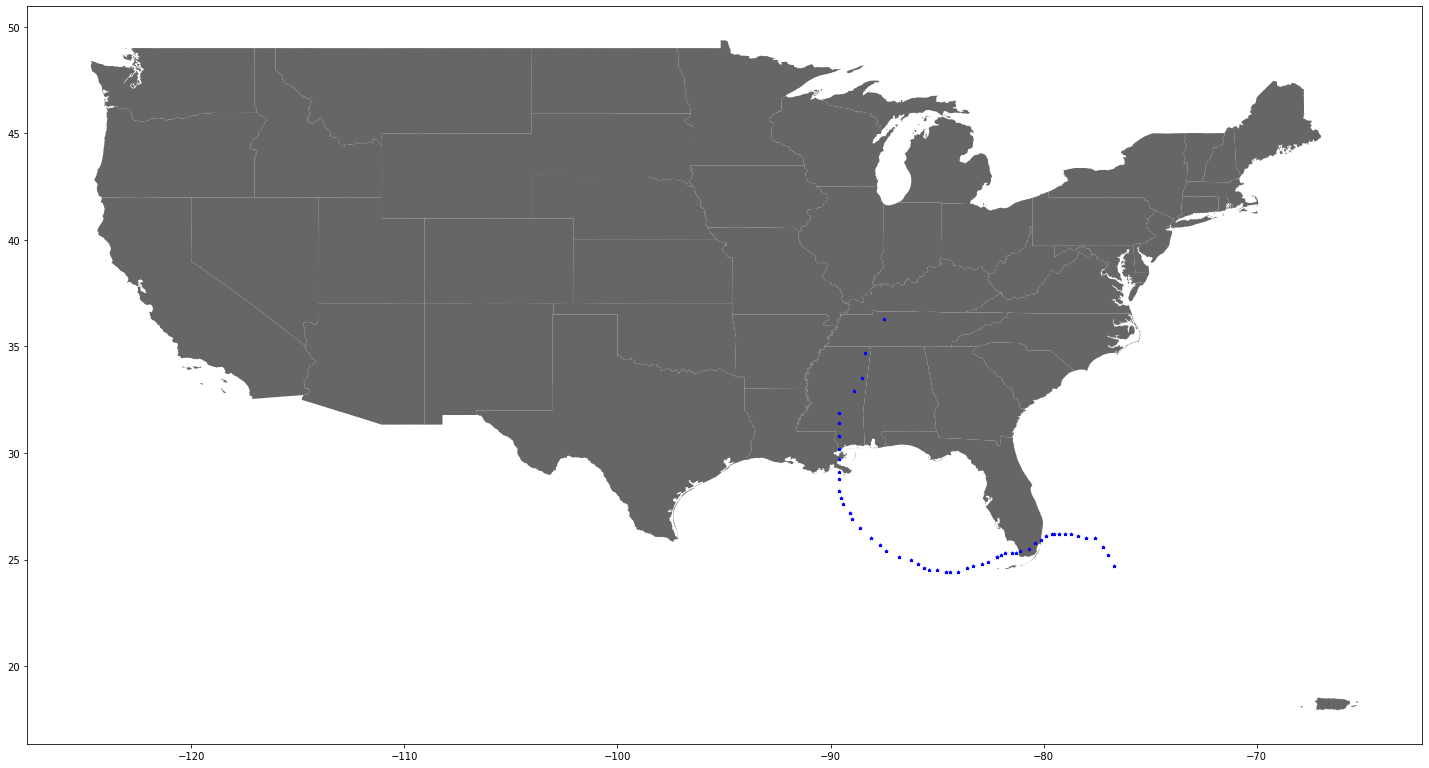

In [125]:
# plotting the hurricane position on top with blue color
fig, ax = plt.subplots(1, figsize=(25,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#666666')

katrina.plot(ax=base, color='blue', marker="*", markersize=10);

Text(0.5, 1, 'Hurricane Katrina in US Map')

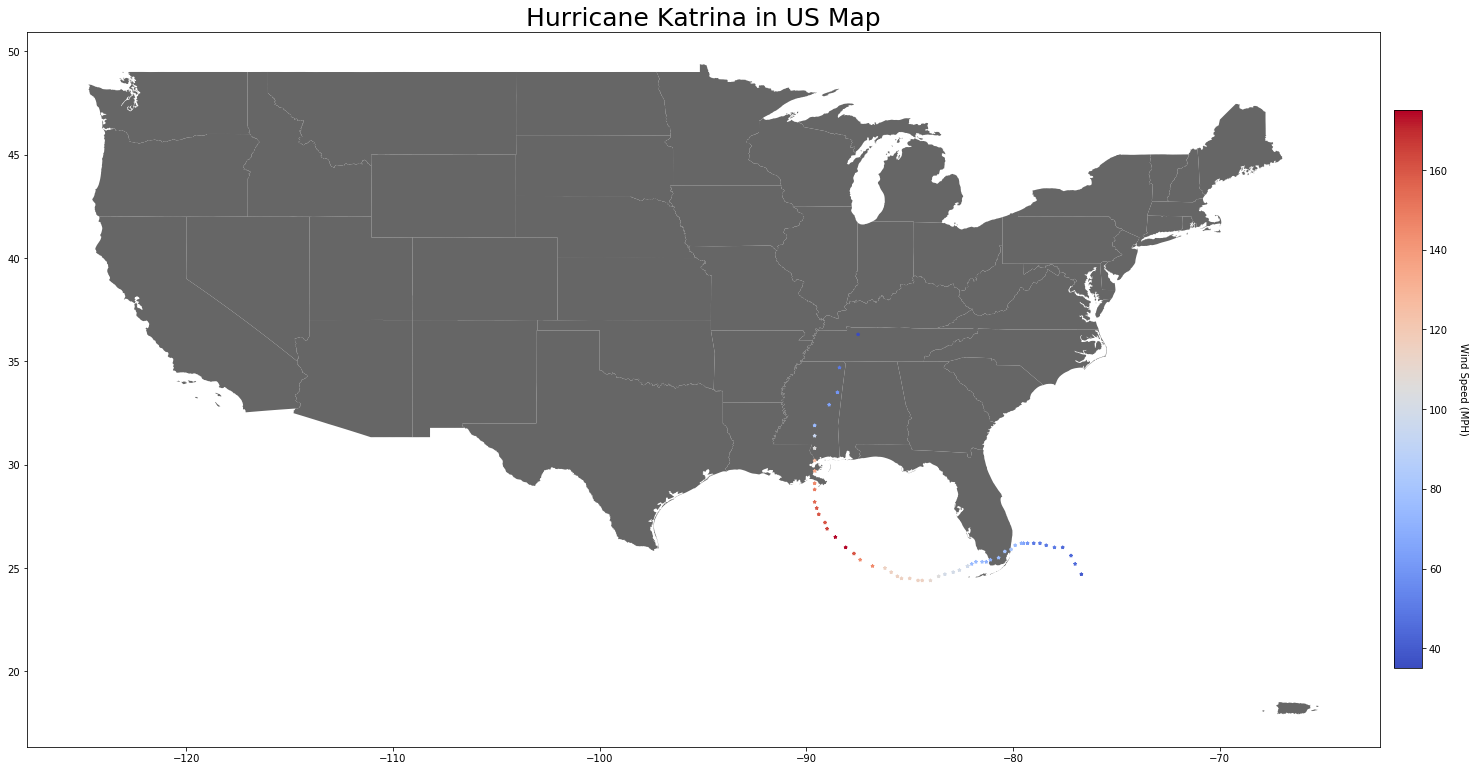

In [150]:
# Plot the path colored by windspeed
fig, ax = plt.subplots(1, figsize=(25,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#666666')
katrina.plot(ax=base, column='Wind', marker="*", markersize=10, cmap='coolwarm', label="Wind speed(mph)")
ax = plt.gca() #get the current axes
PCM = ax.get_children()[1] #get the mappable, the 1st and the 2nd are the x and y axes
cbar = plt.colorbar(PCM, ax=ax, fraction=0.02, pad=0.01)
cbar.set_label('Wind Speed (MPH)', rotation=270, labelpad=20)
ax.set_title("Hurricane Katrina in US Map", fontsize=25)